In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [9]:
companies=pd.read_csv("DataFiles/companies.csv",sep=",",encoding = "ISO-8859-1")
rounds2=pd.read_csv("DataFiles/rounds2.csv",sep=",",encoding = "ISO-8859-1")

As round2 still have some special characters we will <b>forcefully encode and decode</b> the frame to remove that special characters.

In [10]:
rounds2['company_permalink'] = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

To find unique values :<br/>
Convert values of key columns i.e permalink of companies and company_permalink of rounds2 to <b>Lower case.</b>   

In [11]:
rounds2["company_permalink"]=rounds2["company_permalink"].str.lower()
companies["permalink"]=companies["permalink"].str.lower()
#Unique Value Counts
print("companies Unique Values :", companies["permalink"].nunique()) # Companies : 66368
print("Rounds2 Unique Values :", rounds2["company_permalink"].nunique()) #rounds2 :66368

companies Unique Values : 66368
Rounds2 Unique Values : 66368


Are there any companies in the rounds2 file which are not  present in companies :-- <b>"NO"</b>


In [12]:
rounds2.company_permalink[~rounds2['company_permalink'].isin(companies['permalink'])].count()


0

Which column can be used as UNIQUE KEY for Companies:-- <b>"permalink"</b>

In [13]:
companies.set_index("permalink",inplace=True)

In [14]:
#Merge DateFrames:
master_frame=pd.merge(rounds2,companies,how="left",left_on="company_permalink",right_on="permalink")
master_frame.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


How many Observations are present in New merged dataframe:--<b>114949</b><br/>
(observations are before cleaning merge dataframe)

In [15]:
master_frame.shape

(114949, 15)

<b>Data Cleaning:</b>

In [16]:
#find Null value percentange for each column.
master_frame.isnull().mean()*100

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
name                        0.000870
homepage_url                5.336280
category_list               2.966533
status                      0.000000
country_code                7.549435
state_code                  9.522484
region                      8.844792
city                        8.842182
founded_at                 17.852265
dtype: float64

1. Funding_round_code has 72% of null values so we will drop this column.Also we are not using this column in analysis.
2. "raised_amount_usd" is the column we will be using for analysis which have 17% of Null values.<br/>
    But we will be using aggregate functions over this column which are capable of handling null values. <br/>
    So we will ignore this null values

In [17]:
master_frame.drop(['funding_round_code'], axis = 1,inplace=True)
master_frame.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


# Checkpoint-2

In [18]:
#Find Average Funding amount for Funding Type and then convert exponential form to integer
fundingAvg = pd.DataFrame(master_frame.groupby('funding_round_type').mean().astype('int64')).reset_index(level=0)
fundingAvg

,funding_round_type,raised_amount_usd
0,angel,958694
1,convertible_note,1453438
2,debt_financing,17043526
3,equity_crowdfunding,538368
4,grant,4300576
5,non_equity_assistance,411203
6,post_ipo_debt,168704571
7,post_ipo_equity,82182493
8,private_equity,73308593
9,product_crowdfunding,1363131


Using above fundingAvg dataframe we can draw following conclusions:

1. Average funding amount of venture type -11748949 USD <br/>
2. Average funding amount of Angel type   -9958694 USD <br/> 
3. Average funding amount of Seed type    -719817 USD <br/>
4. Average funding amount of venture type -11748949 USD <br/>        

In [19]:
#find Suitable round for investment between 5-11 million USd
fundingAvg.loc[fundingAvg["raised_amount_usd"].between(5000000, 15000000)]

,funding_round_type,raised_amount_usd
13,venture,11748949


<b>"Venture" is the most Suitable type for sparks funds.</b>

# Checkpoint 3

Top 9 Countries based on Sutaible investment Type (Venture) and total investment received for country. <br/>
Then for analysis we will convert Raised amount in integer format for better understanding of values.

In [20]:
top9=master_frame[master_frame.funding_round_type=="venture"].groupby(["country_code"]).sum().sort_values(by="raised_amount_usd",ascending=False).reset_index(level=0).head(9)
top9["raised_amount_usd"]=top9["raised_amount_usd"].astype('int64')
top9

,country_code,raised_amount_usd
0,USA,422510842796
1,CHN,39835418773
2,GBR,20245627416
3,IND,14391858718
4,CAN,9583332317
5,FRA,7259536732
6,ISR,6907514579
7,DEU,6346959822
8,JPN,3363676611


From above top9 dataframe and English as a official language. Below are top 3 countries<br/>
1. Top English speaking country: <b>USA</b><br/>
2. Second English speaking country :<b> GBR</b><br/>
3. Third English speaking country  : <b>IND </b><br/>

# Checkpoint 4

In [21]:
#import mapping.csv
mapping=pd.read_csv("DataFiles/mapping.csv",sep=",",encoding = "ISO-8859-1")
mapping.shape

(688, 10)

<b>Cleaning dataframe :</b>
1. Remove human error from category_list column(ex:A0lytics-->Analytics), we will replace 0 with na AND again <br/>
   'enterprise 2.na' with enterprise 2.0'
2. Change the case of Category list column to lower case.<br/>
3. Remove Nan Values from DF category_list Column

In [22]:
mapping["category_list"]=mapping["category_list"].str.replace('0','na')
mapping['category_list']=mapping['category_list'].str.replace('enterprise 2.na','enterprise 2.0')

#Change Value to lower case
mapping["category_list"]=mapping["category_list"].str.lower()

#find  count of null values
mapping.isna().sum()

#remove Null: Only one null value is present in whole df so we can use df.dropna
mapping.dropna(inplace=True)

As Mapping dataframe is wide type we will convert it to long type first by adding new column:<br/>
To directly map category_list value to main category.
Later we will Use this 2 columns for merging.

In [23]:
#Map Main_Category for Category as a new colum in Mapping.csv.

mapping['main_category'] = (mapping == 1).idxmax(axis=1)
mapping= mapping.loc[:,["category_list","main_category"]]

#set index as we are yousing this column for merging.
mapping.set_index("category_list",inplace=True)

In [24]:
mapping.head()

,main_category
category_list,
3d,Manufacturing
3d printing,Manufacturing
3d technology,Manufacturing
accounting,"Social, Finance, Analytics, Advertising"
active lifestyle,Health


Extract Primary sector from category list column of master_frame in new column: 

In [25]:
master_frame["primary_sector"]=master_frame["category_list"].apply(lambda x: str(x).split("|")[0].lower())
master_frame.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,application platforms
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,application platforms


In [26]:
#left Join to merge dataframes-
master_frame =pd.merge(master_frame,mapping,how="left",left_on="primary_sector",right_on="category_list")
master_frame.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_category
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,application platforms,"News, Search and Messaging"
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,application platforms,"News, Search and Messaging"


# Checkpoint 5

Sutaible FT for spark fund is "Venture" and the range of funding preferred by Spark Funds is 5 to 15 million USD.<br/>
So we will Filter our dataframe for this conditions.

In [27]:
merged_DataFrame=master_frame[master_frame.raised_amount_usd.between(5000000, 15000000) & (master_frame.funding_round_type=="venture")]

Create dataframe for 3 countries from above filtered dataframe.

In [28]:
D1=merged_DataFrame.loc[merged_DataFrame.country_code=="USA"]
D2=merged_DataFrame.loc[merged_DataFrame.country_code=="GBR"]
D3=merged_DataFrame.loc[merged_DataFrame.country_code=="IND"]

 Total number of investments (count) :

In [29]:
print("USA :",D1.raised_amount_usd.count())
print("GBR :",D2.raised_amount_usd.count())
print("IND :",D3.raised_amount_usd.count())

USA : 12150
GBR : 628
IND : 330


Total amount of investment (USD) : 

In [30]:
print("USA :",D1.raised_amount_usd.sum())
print("GBR :",D2.raised_amount_usd.sum())
print("IND :",D3.raised_amount_usd.sum())


USA : 108531347515.0
GBR : 5436843539.0
IND : 2976543602.0


The total number (or count) of investments for each main sector in a separate column "count_investment" : 

In [31]:
D1["count_investment"]=D1.groupby("main_category")["raised_amount_usd"].transform("count")
D2["count_investment"]=D2.groupby("main_category")["raised_amount_usd"].transform("count")
D3["count_investment"]=D3.groupby("main_category")["raised_amount_usd"].transform("count")

The total amount invested in each main sector in a separate column.

In [32]:
D1["sum_investment"]=D1.groupby("main_category")["raised_amount_usd"].transform("sum")
D2["sum_investment"]=D2.groupby("main_category")["raised_amount_usd"].transform("sum")
D3["sum_investment"]=D3.groupby("main_category")["raised_amount_usd"].transform("sum")

<b>To take 3 Sector and Count of investment -</b>

As we already have  column "count_investment" for no of investment per sector.<br/>
We will groupby sector and will take first row from each group using nth().As value for all rows in each group are same.<br/>
Then will Take 3 largest values from above using nlargest(3)<br/>
we will get first Three Top sector Names and No of Investment for those sectors for respective country. (Table 5.1: 3-8 answers) <br/>


In [33]:
def top3SectorNameCount(CD):
    top3sector=CD.groupby('main_category').nth(1).nlargest(3, 'count_investment').reset_index()
    return top3sector.loc[:,["main_category","count_investment","country_code"]]

In [34]:
#USA
USATop3=top3SectorNameCount(D1)
USATop3

,main_category,count_investment,country_code
0,Others,2950.0,USA
1,"Social, Finance, Analytics, Advertising",2714.0,USA
2,Cleantech / Semiconductors,2350.0,USA


In [35]:
#GBR
GBRTop3=top3SectorNameCount(D2)
GBRTop3

,main_category,count_investment,country_code
0,Others,147.0,GBR
1,"Social, Finance, Analytics, Advertising",133.0,GBR
2,Cleantech / Semiconductors,130.0,GBR


In [36]:
#IND
INDTop3=top3SectorNameCount(D3)
INDTop3

,main_category,count_investment,country_code
0,Others,110.0,IND
1,"Social, Finance, Analytics, Advertising",60.0,IND
2,"News, Search and Messaging",52.0,IND


Which Company Received highest amount in sectors.

In [37]:
def highestCompanyName(CountryData,sector):
    dataBySector=CountryData.loc[CountryData.main_category==sector]
    result=dataBySector.groupby(["company_permalink","name"])["raised_amount_usd"].sum().sort_values(ascending=False).reset_index()
    return(result['name'].iloc[0])
    

Highest Amount Received Company Name For #Top1 Sector For Top3 Countries (Table 5.1 :point9)

In [38]:
#USA
print(highestCompanyName(D1,'Others'))
#GBR
print(highestCompanyName(D2,'Others'))
#IND
print(highestCompanyName(D3,'Others'))

Virtustream
Electric Cloud
FirstCry.com


Highest Amount Received Company Name For #Top2 Sector For Top3 Countries (Table 5.1 :point10)

In [39]:
#USA
print(highestCompanyName(D1,'Social, Finance, Analytics, Advertising'))
#GBR
print(highestCompanyName(D2,'Social, Finance, Analytics, Advertising'))
#IND
print(highestCompanyName(D3,'Social, Finance, Analytics, Advertising'))

SST Inc. (Formerly ShotSpotter)
Celltick Technologies
Manthan Systems


# Checkpoint 6

<b> ***  Chart : Fraction of amount received and average amount for FT *** :</b>

In [40]:
#create data in required format for chart
FT=["angel","private_equity","seed","venture"]
Data=master_frame[master_frame.funding_round_type.isin(FT)]
PerData=Data.groupby("funding_round_type").sum().apply(lambda x: 100*x/x.sum()).sort_values( by="raised_amount_usd",ascending=False).reset_index()
AvgData=Data.groupby("funding_round_type").mean().sort_values( by="raised_amount_usd",ascending=False).reset_index()

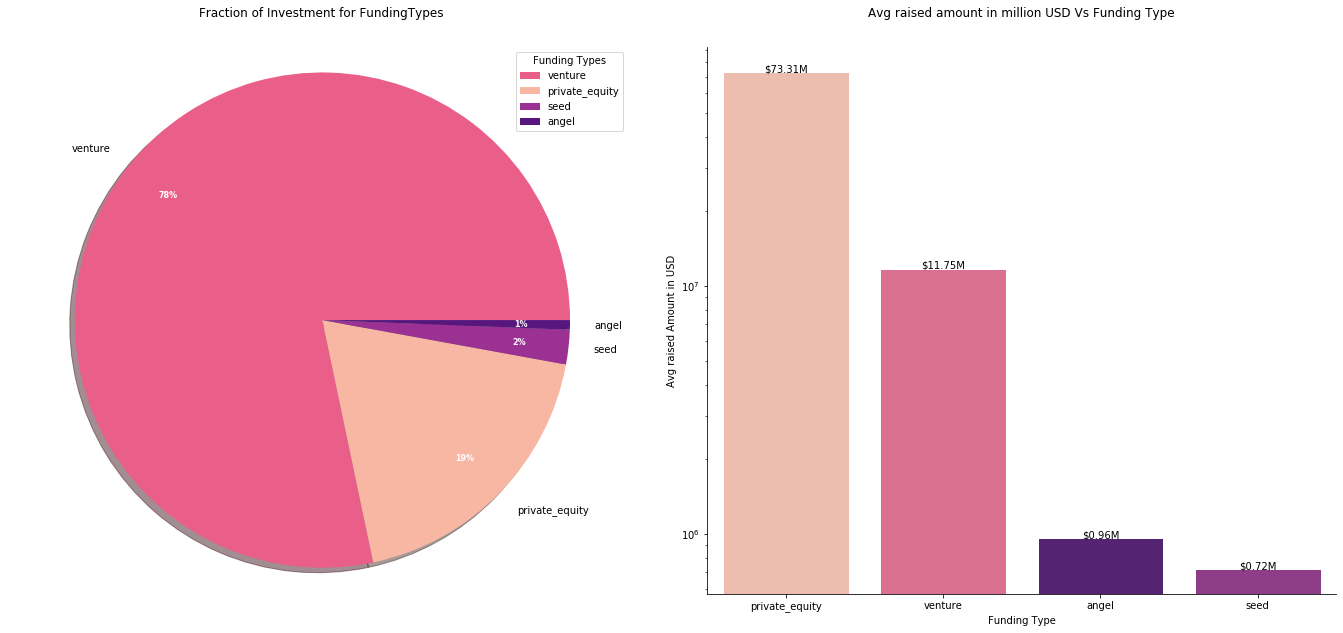

In [41]:
fig,(a,b) =  plt.subplots(1,2,figsize=(20,9))
fig.tight_layout(pad=4.0)

#Pie chart for fraction
color_palette_list=[ '#EA5F89','#F7B7A3','#9B3192','#57167E']
wedges, texts, autotexts= a.pie(PerData.raised_amount_usd ,  labels=PerData.funding_round_type,   
                                autopct='%1.0f%%',    colors = color_palette_list, 
                                shadow=True,          startangle=0,   
                                pctdistance=0.8,      labeldistance=1.1)
a.axis('equal')
a.set_title("Fraction of Investment for FundingTypes",pad=30)
a.legend(wedges, PerData.funding_round_type,
          title="Funding Types",
          loc="upper left",
          bbox_to_anchor=(0.8, 0, 0.3, 1))
plt.setp(autotexts, size=8, weight="bold",color='w')


#BAR PLOT For AVERAGE
colorList = ['#F7B7A3','#EA5F89', '#57167E', '#9B3192' ]
avg_chart = sns.barplot(x="funding_round_type", y=AvgData.raised_amount_usd, data=AvgData,
                        palette = colorList, edgecolor = 'w',estimator=np.mean,ax=b)
avg_chart.set(xlabel='Funding Type', ylabel='Avg raised Amount in USD')
avg_chart.set_yscale("log")
plt.title('Avg raised amount in million USD Vs Funding Type',pad=30)

#hide Top and right axes
avg_chart.spines['top'].set_visible(False)
avg_chart.spines['right'].set_visible(False)

#display Values over Bar
for index, row in AvgData.iterrows():
    avg_chart.text(row.name,row.raised_amount_usd, "$"+str(round(row.raised_amount_usd/1000000,2))+"M", color='black', ha="center")
    
plt.show()
#b.figure.savefig("AvgFundingType.png")




<b> ***  Chart : Top 9 countries against the total amount of investments of funding type - Venture ***</b>

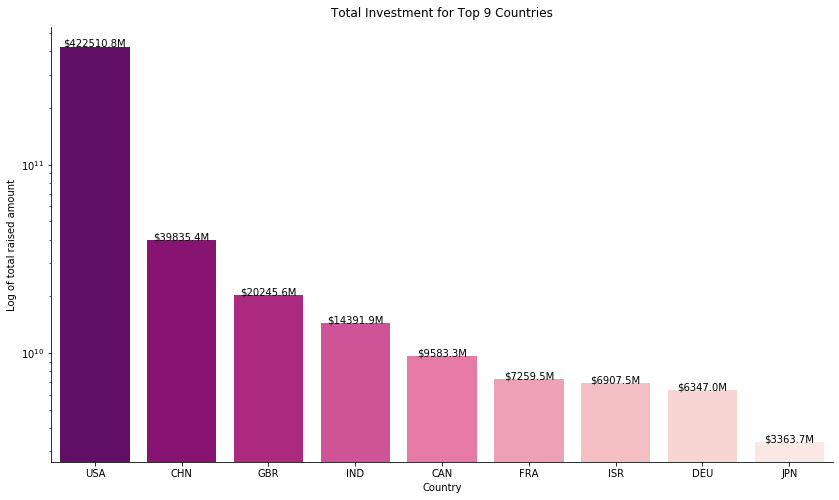

In [42]:
fig = plt.figure(figsize=(14,8))

Top9_chart=sns.barplot(x ='country_code' , y ='raised_amount_usd' , data = top9,palette="RdPu_r" )

Top9_chart.set(xlabel='Country', ylabel='Log of total raised amount')
Top9_chart.set_yscale("log")
plt.title('Total Investment for Top 9 Countries',pad=10)

#display Values over Bar
for index, row in top9.iterrows():
    Top9_chart.text(row.name,row.raised_amount_usd, "$"+str(round(row.raised_amount_usd/1000000,1))+"M", color='black', ha="center")

#hide Top and right axes
Top9_chart.spines['top'].set_visible(False)
Top9_chart.spines['right'].set_visible(False)    

plt.show()
#Top9_chart.figure.savefig("Top9.png")

<b> *** Chart: Number of investments in the top 3 sectors of the top 3 countries for funding type - Venture. *** </b>

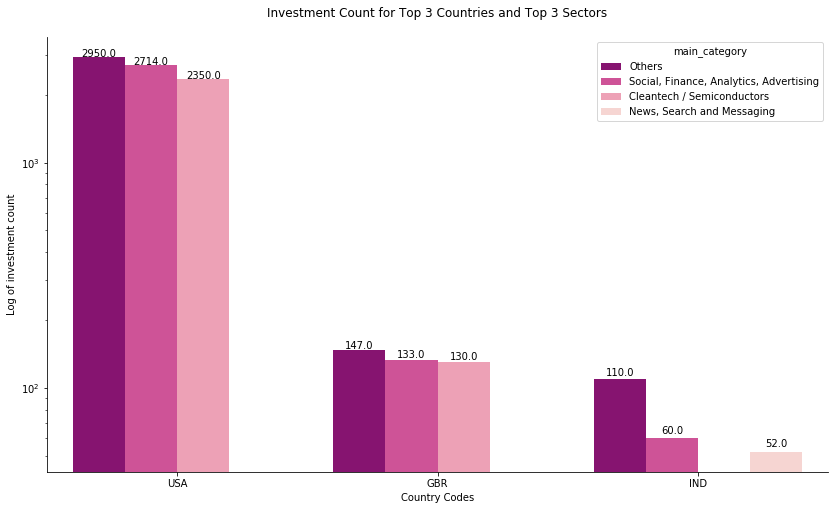

In [43]:
#top 3 Countries having English as official language are : USA,GBR,IND
#We already have dataframes having top3 sectors for top 3 companies we will concat those dataframes.
Top3Data=pd.concat([USATop3,GBRTop3,INDTop3])
fig = plt.figure(figsize=(14,8))

top3_chart=sns.barplot(x = 'country_code', y = 'count_investment',hue="main_category" ,data = Top3Data ,palette="RdPu_r")
top3_chart.set(xlabel='Country Codes', ylabel='Log of investment count')
top3_chart.set_yscale("log")
plt.title('Investment Count for Top 3 Countries and Top 3 Sectors',pad=20)

#display Values over Bar
for p in top3_chart.patches:
    bar_height = p.get_height() if not pd.isnull(p.get_height()) else 0
    bar_width = p.get_width() if not pd.isnull(p.get_width()) else 0
    bar_x = p.get_x() if not pd.isnull(p.get_x()) else 0
    top3_chart.text(bar_x + (bar_width / 2.0),
            bar_height + 3, bar_height or '', color='black', ha="center")

top3_chart.spines['top'].set_visible(False)
top3_chart.spines['right'].set_visible(False) 
    
plt.show()

#top3_chart.figure.savefig("Top3.png")